In [12]:
#透過距離計算用プログラム
#x軸に沿ったスリットの平行移動を考える

def light_receiving_t_d(gradient ,intercept, x_k, y_k, distance1, distance2, slit1, slit2, r_d):
    
    #スリットの位置の定義
    #配列制作用
    const = r_d
    i = 0
    x1y1 = np.zeros((const*2 +1,2))
    x2y2 = np.zeros((const*2 +1,2))
    #とりあえず外径の　1.5倍外
    
    #ここおかしくね？？？？
    for d in [tmp*0.1 for tmp in range(-const, const+1)]:
        x1 = d
        y1 = distance1
        x2 = d
        y2 = distance2
        x1y1[i][0] = x1
        x1y1[i][1] = y1
        x2y2[i][0] = x2
        x2y2[i][1] = y2
        i += 1 


    count_light = [0] * (const *2 + 1)
    
    cnt_slit1 = 0
    cnt_slit2 = 0
    
    #透過距離
    distance_t = np.arange(const * 2 + 1)
    #ここのとり方を変える
    
    for g, i, xk, yk in zip(gradient, intercept, x_k, y_k):
        for j in range(-const, const +1): #-x,xで動かす
            #スリットと,光線の交点
            a = 0
            b = x1y1[j][1]
            x = (i - b)/(a - g)
            #スリット幅(斜めver)
            s_d = slit1/2
            #1つ目のスリットを超えられるかどうか
            ##この条件がおかしそう
            if x < x1y1[j][0] + s_d and x1y1[j][0] - s_d < x:
                #2つめの条件に変更
                b = x2y2[j][1]
                x = (i - b)/(a - g)
                s_d = slit2/2
                cnt_slit1 += 1
                #2つ目のスリットを超えられるかどうか
                if x < x2y2[j][0] + s_d and x2y2[j][0] - s_d < x:
                    cnt_slit2 += 1
                    #光の本数をカウント
                    count_light[j] += 1
                    
    return count_light, distance_t
                    

In [13]:
#透過角 を求めるための回転装置をもしたシミュレーション
#90度だけで良さそう
#全ての直線データをぶちこむ
#外周座標は最後の透過角を求めるために必要。
# import time

def light_receiving_t_a(gradient ,intercept, x_k, y_k, distance1, distance2, slit1, slit2):
    #print("値が入ってるか？",gradient[0],intercept[0],x_k[0],y_k[0],distance1,distance2)
#     t1 = time.time() 
    
    #まずslitの位置を定義 下準備
    #円管とスリットの距離の定義が必要
#     distance1 = 1
#     distance2 = 1
    i = 0
    x1y1 = np.zeros((900,2))
    x2y2 = np.zeros((900,2))
    s_sita = np.zeros(1801)
    for sita in [tmp*0.1 for tmp in range(900, 1800)]:
        x1 = distance1*np.cos(np.deg2rad(sita))
        y1 = distance1*np.sin(np.deg2rad(sita))
        x2 = distance2*np.cos(np.deg2rad(sita))
        y2 = distance2*np.sin(np.deg2rad(sita))
        similar_sita = abs(np.arctan(np.tan(abs(x1)/abs(y1))))
        x1y1[i][0] = x1
        x1y1[i][1] = y1
        x2y2[i][0] = x2
        x2y2[i][1] = y2
        s_sita[i] = similar_sita
        i += 1
        
    # 経過時間を表示
#     t2 = time.time()
#     elapsed_time_1 = t2-t1
#     print(f"経過時間：{elapsed_time_1}","秒")
#     print("---------------下準備終了！------------------")
    
#     t3 = time.time() 
    #スリット幅を入力
    #need to change
#     slit1 = 1
#     slit2 = 1
    #ある角度における光線の本数カウント用
    count_light = [0] * 900
    count_x = [0] * 900
    count_y = [0] * 900
    t_angle = [0] * 900
    
    cnt_slit1 = 0
    cnt_slit2 = 0
    
    for g, i, xk, yk in zip(gradient, intercept, x_k, y_k):
        for j in range(900): #90度分の回転を表す
            #スリットの傾きと,光線の交点
            a = -np.tan(s_sita[j])
            b = x1y1[j][1] - a*x1y1[j][0]
            x = (i - b)/(a - g)
            #スリット幅(斜めver)
            s_d = slit1*np.cos(abs(s_sita[j]))/2
            #1つ目のスリットを超えられるかどうか
            if x < x1y1[j][0] + s_d and x1y1[j][0] - s_d < x:
                #2つめの条件に変更
                b = x2y2[j][1] - a*x2y2[j][0]
                x = (i - b)/(a - g)
                s_d = slit2*np.cos(abs(s_sita[j]))/2
                cnt_slit1 += 1
                #2つ目のスリットを超えられるかどうか
                if x < x2y2[j][0] + s_d and x2y2[j][0] - s_d < x:
                    cnt_slit2 += 1
                    #光の本数をカウント
                    count_light[j] += 1
                    #透過角算出用のx,yもおいておきたい→平均orとりあえずmin,maxの2つをキープしておいて考える。
                    #怪しい、場合によってはmaxminが大幅に離れてる？→ここはどのへんに値が偏っているのかを見てもいいかも一旦保留
                    count_x[j] += xk
                    count_y[j] += yk
    
    # 経過時間を表示
#     t4 = time.time()
#     elapsed_time_2 = t4-t3
#     print(f"経過時間：{elapsed_time_2}","秒")
#     print("---------------光線の処理完了！------------------")
#     print("スリット1枚目を超えられた本数",cnt_slit1)
#     print("スリット2枚目を超えられた本数",cnt_slit2)
    #print("光線の本数は？",sum(count_light))
    
#     t5 = time.time()
    #jごとの透過角を求める必要がある(横軸)
    for j in range(900):
        #ある角度jのときのスリットを透過する外周の点の平均
        if count_light[j] == 0:
            continue
        x_g = count_x[j]/count_light[j]
        y_g = count_y[j]/count_light[j]
        x_slit2 = x2y2[j][0]
        y_slit2 = x2y2[j][1]
        a = y_slit2 - y_g
        b = x_g - x_slit2
        c = 1
        d = 0
        t_angle[j] = np.rad2deg(np.arctan(np.tan(abs(a*d - b*c)/abs(a*c + b*d))))
        
    # 経過時間を表示
#     t6 = time.time()
#     elapsed_time_3 = t6-t5
#     print(f"経過時間：{elapsed_time_3}","秒")
#     print("---------------透過角算出！------------------")
    
#     print("総実行時間:",(elapsed_time_1+elapsed_time_2+elapsed_time_3)/60,"分")
    
    
    return count_light, t_angle 

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import time 
import numpy as np

#need to change
max_step = 3000
for step in range(2000, max_step, 1000):
    for threshold in [tmp*0.05 for tmp in range(1, 20)]:
        r = step
        r_i = step*threshold
        r_i = round(r_i)
        #1mm → 10000  0.2mm → 2000 0.05mm → 500
        #円管とスリットの距離
        d1 = 10000
        d2 = d1*1.1
        #スリット幅
        s1 = 2000
        s2 = 500
        #複数のCSVファイルを順次読み込んでグラフを表示していく
        df = pd.read_csv('./data_csv/dataset_r_i_{0}_r_{1}.csv'.format(r_i, r))
        new_x_a_list = df['x'] 
        new_y_a_list = df['y']
        gradient_list = df['gradient']
        intercept_list = df['intercept']
        light_num_a, toka_angle = light_receiving_t_a(gradient_list ,intercept_list, new_x_a_list, new_y_a_list, d1, d2,s1 ,s2)
        
        d1 = 50000
        d2 = d1*1.1
        light_num_d, distance = light_receiving_t_d(gradient_list ,intercept_list, new_x_a_list, new_y_a_list, d1, d2,s1 ,s2, r)
        
        fig = plt.figure(figsize=(12,6))
#         fig.subplots_adjust(wspace=0.5)
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(1, 2, 2)
        ax1.set_xlim([0,90])
        ax1.bar(toka_angle, light_num_a, width=1.0)
        ax2.bar(distance, light_num_d, width=1.0)
        ax1.set_title('Inner_diameter = {0}mm External_diameter = {1}mm'.format(r_i*2/10000, r*2/10000))
        ax2.set_title('Inner_diameter = {0}mm External_diameter = {1}mm'.format(r_i*2/10000, r*2/10000))
        ax1.set_xlabel('Transmission angle')
        ax2.set_xlabel('Distance')
        ax1.set_yticklabels([])
#         ax2.set_yticklabels([])
        ax1.tick_params(length=0)
#         ax2.tick_params(length=0)
        plt.show()

KeyboardInterrupt: 

In [ ]:
#透過角の最大値を計算するプログラム

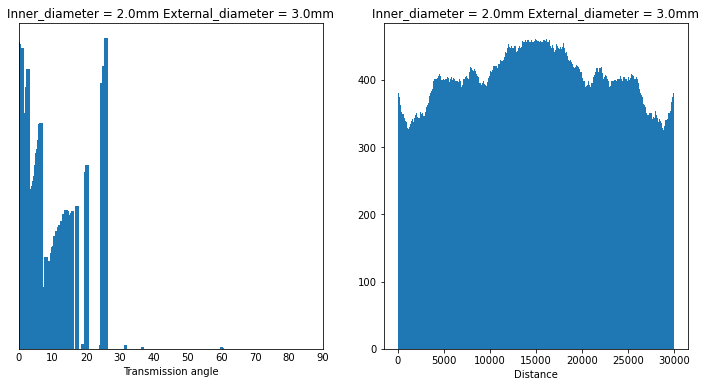

In [14]:
#テスト用
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import time 
import numpy as np

#need to change

r = 15000
r_i = 10000
r_i = round(r_i)
#1mm → 10000  0.2mm → 2000 0.05mm → 500
#円管とスリットの距離
d1 = 10000
d2 = d1*1.1
#スリット幅
s1 = 2000
s2 = 500
#複数のCSVファイルを順次読み込んでグラフを表示していく
df = pd.read_csv('./data_csv/dataset_r_i_{0}_r_{1}.csv'.format(r_i, r))
new_x_a_list = df['x'] 
new_y_a_list = df['y']
gradient_list = df['gradient']
intercept_list = df['intercept']
light_num_a, toka_angle = light_receiving_t_a(gradient_list ,intercept_list, new_x_a_list, new_y_a_list, d1, d2,s1 ,s2)

d1 = 10000
d2 = d1*1.1
light_num_d, distance = light_receiving_t_d(gradient_list ,intercept_list, new_x_a_list, new_y_a_list, d1, d2,s1 ,s2, r)

fig = plt.figure(figsize=(12,6))
#         fig.subplots_adjust(wspace=0.5)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.set_xlim([0,90])
ax1.bar(toka_angle, light_num_a, width=1.0)
ax2.bar(distance, light_num_d, width=1.0)
ax1.set_title('Inner_diameter = {0}mm External_diameter = {1}mm'.format(r_i*2/10000, r*2/10000))
ax2.set_title('Inner_diameter = {0}mm External_diameter = {1}mm'.format(r_i*2/10000, r*2/10000))
ax1.set_xlabel('Transmission angle')
ax2.set_xlabel('Distance')
ax1.set_yticklabels([])
#         ax2.set_yticklabels([])
ax1.tick_params(length=0)
#         ax2.tick_params(length=0)
plt.show()

In [15]:
tmp = 0
tmp2 = 0
for i in range(len(light_num_a)):   
    if tmp < light_num_a[i]:
        tmp = light_num_a[i]
        tmp2 = toka_angle[i]

print("光線数",tmp,"透過角",tmp2)

tmp = 0
tmp2 = 0

for i in range(int(len(light_num_d)/2)):   
    if tmp < light_num_d[i]:
        tmp = light_num_d[i]
        tmp2 = distance[i]

max_value = max(light_num_d)
max_index = light_num_d.index(max_value)
tmp = distance[max_index]
print(tmp)

print("光線数",tmp,"透過距離",(distance[-1]-tmp*2)/10000,"mm")

光線数 466 透過角 25.924658672627125
13849
光線数 13849 透過距離 0.2302 mm


もう少し大きな値で回す必要がある。